In [1]:
!pip install pandas --quiet

In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('medical.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

In [7]:
# !pip install plotly matplotlib seaborn --quiet
!pip install ipykernel --quiet
!pip install --upgrade nbformat --quiet

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [16]:
# Box-Plot + Histogram
# Histogram Bins 47=64-18= one for each year
# Box Plot where the data lies mostly

fig = px.histogram(medical_df, x='age', marginal='box',
                   nbins=47, title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [14]:
fig = px.histogram(medical_df, x='bmi', marginal='box', color_discrete_sequence=['red'],
                   title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()

# Gaussian Distribution

In [18]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [23]:
fig = px.histogram(medical_df, x='charges', marginal='box', color='smoker',
                   color_discrete_sequence=['green', 'grey'], 
                   title="Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

# Power Law

In [27]:
medical_df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [28]:
px.histogram(medical_df, x='smoker', color="sex", title="Smoker")

In [ ]:
# AGE VS CHARGES

fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [35]:
# BMI VS CHARGES
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 hover_data=['sex'],
                 opacity=0.8,
                 title="BMI VS CHARGES")
fig.update_traces(marker_size=5)
fig.show()

As from the Analysis, the values in some columns are more closely related to the values in "charges" compared to other columns.

E.g "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't

The relationship is often expressed numerically using a measure called correlation coefficient, which can be computed using .corr

In [36]:
medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [37]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [38]:
# Smoker column have categorical values and we want numeric
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [39]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

In [47]:
medical_df_skim = medical_df[['age', 'children', 'bmi', 'charges']]
medical_df_skim.corr()

,age,children,bmi,charges
age,1.000000,0.042469,0.109272,0.299008
children,0.042469,1.000000,0.012759,0.067998
bmi,0.109272,0.012759,1.000000,0.198341
charges,0.299008,0.067998,0.198341,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

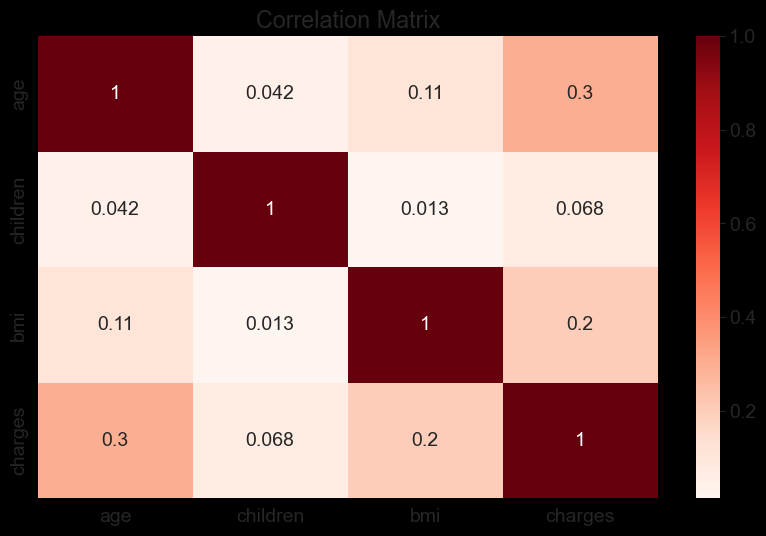

In [50]:
sns.heatmap(medical_df_skim.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')